# Twitter Sentiment Analysis using Sentiment file provided for Assignment purpose.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
import nltk

In [2]:
import nltk

In [3]:
Data = pd.read_csv('C:/Users/91805/Documents/Kalpesh Mahajan/Natuaral Language Processing Class/Sentiment.csv')

In [4]:
Data.head(3)

id               candidate  candidate_confidence relevant_yn  \
0   1  No candidate mentioned                   1.0         yes   
1   2            Scott Walker                   1.0         yes   
2   3  No candidate mentioned                   1.0         yes   

   relevant_yn_confidence sentiment  sentiment_confidence     subject_matter  \
0                     1.0   Neutral                0.6578  None of the above   
1                     1.0  Positive                0.6333  None of the above   
2                     1.0   Neutral                0.6629  None of the above   

   subject_matter_confidence candidate_gold  ... relevant_yn_gold  \
0                     1.0000            NaN  ...              NaN   
1                     1.0000            NaN  ...              NaN   
2                     0.6629            NaN  ...              NaN   

  retweet_count  sentiment_gold subject_matter_gold  \
0             5             NaN                 NaN   
1            26             NaN                 NaN   
2            27             NaN                 NaN   

                                                text tweet_coord  \
0  RT @NancyLeeGrahn: How did everyone feel about...         NaN   
1  RT @ScottWalker: Didn't catch the full #GOPdeb...         NaN   
2  RT @TJMShow: No mention of Tamir Rice and the ...         NaN   

               tweet_created            tweet_id  tweet_location user_timezone  
0  2015-08-07 09:54:46 -0700  629697200650592256             NaN         Quito  
1  2015-08-07 09:54:46 -0700  629697199560069120             NaN           NaN  
2  2015-08-07 09:54:46 -0700  629697199312482304             NaN           NaN  

[3 rows x 21 columns]

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [6]:
piedata =  Data.sentiment.value_counts() 
piedata

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [7]:
piedata[1:3]

Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

<Figure size 432x288 with 0 Axes>

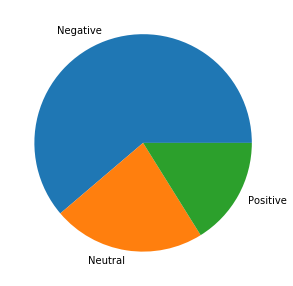

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(5,5))
plt.pie(piedata[0:3],labels=['Negative','Neutral','Positive'])
plt.figure()

In [9]:
TweetData = Data[['text','sentiment']]
TweetData.head()

text sentiment
0  RT @NancyLeeGrahn: How did everyone feel about...   Neutral
1  RT @ScottWalker: Didn't catch the full #GOPdeb...  Positive
2  RT @TJMShow: No mention of Tamir Rice and the ...   Neutral
3  RT @RobGeorge: That Carly Fiorina is trending ...  Positive
4  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  Positive

In [10]:
TweetData.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [11]:
TweetData[TweetData.sentiment != 'Neutral']

text sentiment
1      RT @ScottWalker: Didn't catch the full #GOPdeb...  Positive
3      RT @RobGeorge: That Carly Fiorina is trending ...  Positive
4      RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  Positive
5      RT @GregAbbott_TX: @TedCruz: "On my first day ...  Positive
6      RT @warriorwoman91: I liked her and was happy ...  Negative
...                                                  ...       ...
13866  RT @cappy_yarbrough: Love to see men who will ...  Negative
13867  RT @georgehenryw: Who thought Huckabee exceede...  Positive
13868  RT @Lrihendry: #TedCruz As President, I will a...  Positive
13869  RT @JRehling: #GOPDebate Donald Trump says tha...  Negative
13870  RT @Lrihendry: #TedCruz headed into the Presid...  Positive

[10729 rows x 2 columns]

In [12]:
TweetData = TweetData[TweetData.sentiment != 'Neutral']

In [13]:
TweetData.sentiment.value_counts()

Negative    8493
Positive    2236
Name: sentiment, dtype: int64

In [14]:
TweetData.shape

(10729, 2)

In [15]:
# Check in case any of the columns have missing values.
TweetData.isnull().sum()

text         0
sentiment    0
dtype: int64

In [16]:
TweetData.text.head(10)

1     RT @ScottWalker: Didn't catch the full #GOPdeb...
3     RT @RobGeorge: That Carly Fiorina is trending ...
4     RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5     RT @GregAbbott_TX: @TedCruz: "On my first day ...
6     RT @warriorwoman91: I liked her and was happy ...
8     Deer in the headlights RT @lizzwinstead: Ben C...
9     RT @NancyOsborne180: Last night's debate prove...
10    @JGreenDC @realDonaldTrump In all fairness #Bi...
11    RT @WayneDupreeShow: Just woke up to tweet thi...
12    Me reading my family's comments about how grea...
Name: text, dtype: object

In [17]:
def remove_RT_word(text):
    
    #Operation 1 : Remove the RT Stopword
    Operation1 = [re.sub(r'^RT ',' ',tweet) for tweet in text]
    
    #Operation 2 : Remove the @<handle_name> stopword
    Operation2 = [re.sub('@\w+:',' ',tweet) for tweet in Operation1]
    
    #Operation 3: Remove the @<handle_name with colon stopword
    Operation3 = [re.sub('@\w+',' ',tweet) for tweet in Operation2]
    
    #Operation 4: Remove the # tags
    Operation4 = [re.sub('#\w+',' ',tweet) for tweet in Operation3]
    
    #Operation 5 : Remove HTTP and HTTPS Hyperlinks
    Operation5 = [re.sub('http:\/\/\w.+|https:\/\/\w.+',' ',tweet) for tweet in Operation4]
    
    #Operation 6: Remove special characters from Tweet.
    Operation6 = [re.sub('[\\,--,!,*,..]+',' ',tweet) for tweet in Operation5]
    
    return(Operation6)

In [18]:
TweetData['Removed']=remove_RT_word(TweetData['text'])

In [98]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
print(TweetData.iloc[:,[0,2]].head())

                                                text  \
1  RT @ScottWalker: Didn't catch the full #GOPdeb...   
3  RT @RobGeorge: That Carly Fiorina is trending ...   
4  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...   
5  RT @GregAbbott_TX: @TedCruz: "On my first day ...   
6  RT @warriorwoman91: I liked her and was happy ...   

                                             Removed  
1     Didn't catch the full   last night  Here ar...  
3     That Carly Fiorina is trending   hours afte...  
4       w/   delivered the highest ratings in the...  
5       "On my first day I will rescind every ill...  
6     I liked her and was happy when I heard she ...  


In [24]:
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('English')

In [126]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    print(text)
    #print('-----------------------------------------------------------------------------------------')
    tokens = nltk.word_tokenize(text)
    print(tokens)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    print(text)
    print('-----------------------------------------------------------------------------------------')
    return text

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [128]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [129]:
X_tfidf = tfidf.fit_transform(TweetData.Removed)

   didnt catch the full   last night  here are some of scotts best lines in 90 seconds     
['didnt', 'catch', 'the', 'full', 'last', 'night', 'here', 'are', 'some', 'of', 'scotts', 'best', 'lines', 'in', '90', 'seconds']
['didnt', 'catch', 'full', 'last', 'night', 'scott', 'best', 'line', '90', 'second']
-----------------------------------------------------------------------------------------
   that carly fiorina is trending   hours after her debate   above any of the men in just completed   says shes on …
['that', 'carly', 'fiorina', 'is', 'trending', 'hours', 'after', 'her', 'debate', 'above', 'any', 'of', 'the', 'men', 'in', 'just', 'completed', 'says', 'shes', 'on', '…']
['carli', 'fiorina', 'trend', 'hour', 'debat', 'men', 'complet', 'say', 'she', '…']
-----------------------------------------------------------------------------------------
     w   delivered the highest ratings in the history of presidential debates     
['w', 'delivered', 'the', 'highest', 'ratings', 'in', 'th

['i', 'cant', 'tell', 'if', 'these', 'are', 'just', 'bad', 'cramps', 'or', 'my', 'uterus', 'trying', 'to', 'flee', 'the', 'country', 'as', 'i', 'watch', 'the']
['cant', 'tell', 'bad', 'cramp', 'uteru', 'tri', 'flee', 'countri', 'watch']
-----------------------------------------------------------------------------------------
   and now the realization dawns on us  holy shit  ive been watching fox news   
['and', 'now', 'the', 'realization', 'dawns', 'on', 'us', 'holy', 'shit', 'ive', 'been', 'watching', 'fox', 'news']
['realiz', 'dawn', 'us', 'holi', 'shit', 'ive', 'watch', 'fox', 'news']
-----------------------------------------------------------------------------------------
hey    you know who didnt whine about unfair questions   grow a set why dont ya   
['hey', 'you', 'know', 'who', 'didnt', 'whine', 'about', 'unfair', 'questions', 'grow', 'a', 'set', 'why', 'dont', 'ya']
['hey', 'know', 'didnt', 'whine', 'unfair', 'question', 'grow', 'set', 'dont', 'ya']
-------------------------

early2000s i did political theater wbillionaires for bush or gore re corruption of  in politics    trump i buy em all 
['early2000s', 'i', 'did', 'political', 'theater', 'wbillionaires', 'for', 'bush', 'or', 'gore', 're', 'corruption', 'of', 'in', 'politics', 'trump', 'i', 'buy', 'em', 'all']
['early2000', 'polit', 'theater', 'wbillionair', 'bush', 'gore', 'corrupt', 'polit', 'trump', 'buy', 'em']
-----------------------------------------------------------------------------------------
   everybody wanna be a jesus freak till its time to feed the poor   
['everybody', 'wan', 'na', 'be', 'a', 'jesus', 'freak', 'till', 'its', 'time', 'to', 'feed', 'the', 'poor']
['everybodi', 'wan', 'na', 'jesu', 'freak', 'till', 'time', 'feed', 'poor']
-----------------------------------------------------------------------------------------
   this sums up the   perfectly   
['this', 'sums', 'up', 'the', 'perfectly']
['sum', 'perfectli']
------------------------------------------------------------------

['still', 'wait', 'fox', 'ask', 'appropri', 'billionair', 'buy', 'elect']
-----------------------------------------------------------------------------------------
  meet scott walker’s paranoid  insurrectionist adviser on police violence against african   
['meet', 'scott', 'walker', '’', 's', 'paranoid', 'insurrectionist', 'adviser', 'on', 'police', 'violence', 'against', 'african']
['meet', 'scott', 'walker', '’', 'paranoid', 'insurrectionist', 'advis', 'polic', 'violenc', 'african']
-----------------------------------------------------------------------------------------
  heard some  of your response from     they were clear and to the point  wish you good luck 
['heard', 'some', 'of', 'your', 'response', 'from', 'they', 'were', 'clear', 'and', 'to', 'the', 'point', 'wish', 'you', 'good', 'luck']
['heard', 'respons', 'clear', 'point', 'wish', 'good', 'luck']
-----------------------------------------------------------------------------------------
   check out   with     on xm103 s

['this', 'image', 'best', 'sums', 'up', 'my', 'thoughts', 'regarding', 'last', 'nights']
['imag', 'best', 'sum', 'thought', 'regard', 'last', 'night']
-----------------------------------------------------------------------------------------
    i think you on accidentally uploaded a pic of hillary instead of     
['i', 'think', 'you', 'on', 'accidentally', 'uploaded', 'a', 'pic', 'of', 'hillary', 'instead', 'of']
['think', 'accident', 'upload', 'pic', 'hillari', 'instead']
-----------------------------------------------------------------------------------------
  i cant remember any of their names esp since theyre 90 white men with orange foundation   dying
['i', 'cant', 'remember', 'any', 'of', 'their', 'names', 'esp', 'since', 'theyre', '90', 'white', 'men', 'with', 'orange', 'foundation', 'dying']
['cant', 'rememb', 'name', 'esp', 'sinc', 'theyr', '90', 'white', 'men', 'orang', 'foundat', 'die']
----------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------
lol  of course you do    rt  i think   won     
['lol', 'of', 'course', 'you', 'do', 'rt', 'i', 'think', 'won']
['lol', 'cours', 'rt', 'think']
-----------------------------------------------------------------------------------------
   i pledge to oppose amnesty amp government benefits for illegal immigrants who violated our laws   
['i', 'pledge', 'to', 'oppose', 'amnesty', 'amp', 'government', 'benefits', 'for', 'illegal', 'immigrants', 'who', 'violated', 'our', 'laws']
['pledg', 'oppos', 'amnesti', 'amp', 'govern', 'benefit', 'illeg', 'immigr', 'violat', 'law']
-----------------------------------------------------------------------------------------
   with first debate over  hands down   is my pick for president     
['with', 'first', 'debate', 'over', 'hands', 'down', 'is', 'my', 'pick', 'for', 'president']
['first', 'debat', 'hand', 'pick', 'presid']
----------------------------------------

['walker', 'believ', 'bust', 'union', 'fight', 'terror']
-----------------------------------------------------------------------------------------
   the   last night got me even more fired up about bernie   
 
['the', 'last', 'night', 'got', 'me', 'even', 'more', 'fired', 'up', 'about', 'bernie']
['last', 'night', 'got', 'even', 'fire', 'berni']
-----------------------------------------------------------------------------------------
why did the   get more time than candidates  
['why', 'did', 'the', 'get', 'more', 'time', 'than', 'candidates']
['get', 'time', 'candid']
-----------------------------------------------------------------------------------------
racist  religious fanatic debate         
['racist', 'religious', 'fanatic', 'debate']
['racist', 'religi', 'fanat', 'debat']
-----------------------------------------------------------------------------------------
megan youve called women fat pigs  etc 
  audience ha ha ha 
wtf what is wrong with these people  
['megan', 'youve'

['someon', 'doesnt', 'care', 'offend', 'realli', 'get', 'offend', 'easili']
-----------------------------------------------------------------------------------------
  said he was worried about all the people who cant get in  how about worrying about those born here 4a change    
['said', 'he', 'was', 'worried', 'about', 'all', 'the', 'people', 'who', 'cant', 'get', 'in', 'how', 'about', 'worrying', 'about', 'those', 'born', 'here', '4a', 'change']
['said', 'worri', 'peopl', 'cant', 'get', 'worri', 'born', '4a', 'chang']
-----------------------------------------------------------------------------------------
      best video ever    night at the roxbury with the     lol    
['best', 'video', 'ever', 'night', 'at', 'the', 'roxbury', 'with', 'the', 'lol']
['best', 'video', 'ever', 'night', 'roxburi', 'lol']
-----------------------------------------------------------------------------------------
     i think gods a pretty fair guy  gods not a guy  dr  carson  women as well as men are cr

['dr', 'doom', 'take', 'mask', 'could', 'peopl', 'underneath']
-----------------------------------------------------------------------------------------
i wish we could see kasich vs   for the presidency  the actual issues amp ideas might come out    didnt watch it 
['i', 'wish', 'we', 'could', 'see', 'kasich', 'vs', 'for', 'the', 'presidency', 'the', 'actual', 'issues', 'amp', 'ideas', 'might', 'come', 'out', 'didnt', 'watch', 'it']
['wish', 'could', 'see', 'kasich', 'vs', 'presid', 'actual', 'issu', 'amp', 'idea', 'might', 'come', 'didnt', 'watch']
-----------------------------------------------------------------------------------------
   love to hear an apology from   to   for dragging the debate into the toilet  
['love', 'to', 'hear', 'an', 'apology', 'from', 'to', 'for', 'dragging', 'the', 'debate', 'into', 'the', 'toilet']
['love', 'hear', 'apolog', 'drag', 'debat', 'toilet']
-----------------------------------------------------------------------------------------
   gonna call

['the', 'reason', 'did', 'not', 'take', 'that', 'pledge', 'at', 'is', 'exactly', 'because', 'he', 'is', 'a', 'good', 'negotiator']
['reason', 'take', 'pledg', 'exactli', 'good', 'negoti']
-----------------------------------------------------------------------------------------
local talk radio in la is the best the morning after a presidential debate   
['local', 'talk', 'radio', 'in', 'la', 'is', 'the', 'best', 'the', 'morning', 'after', 'a', 'presidential', 'debate']
['local', 'talk', 'radio', 'la', 'best', 'morn', 'presidenti', 'debat']
-----------------------------------------------------------------------------------------
not sure about jeb bush  but one thing i know for sure is that he didnt help himself wlast nights       
['not', 'sure', 'about', 'jeb', 'bush', 'but', 'one', 'thing', 'i', 'know', 'for', 'sure', 'is', 'that', 'he', 'didnt', 'help', 'himself', 'wlast', 'nights']
['sure', 'jeb', 'bush', 'one', 'thing', 'know', 'sure', 'didnt', 'help', 'wlast', 'night']
----------

['kasich', 'enough', 'sociopath', 'kill', 'useless', 'eater', 'type', 'gop', 'nomine']
-----------------------------------------------------------------------------------------
   can we skip the crap next time rick perry and carly are head amp shoulders above the others       
['can', 'we', 'skip', 'the', 'crap', 'next', 'time', 'rick', 'perry', 'and', 'carly', 'are', 'head', 'amp', 'shoulders', 'above', 'the', 'others']
['skip', 'crap', 'next', 'time', 'rick', 'perri', 'carli', 'head', 'amp', 'shoulder', 'other']
-----------------------------------------------------------------------------------------
      reminds that we still have american hostages languishing in   despite deal    
['reminds', 'that', 'we', 'still', 'have', 'american', 'hostages', 'languishing', 'in', 'despite', 'deal']
['remind', 'still', 'american', 'hostag', 'languish', 'despit', 'deal']
-----------------------------------------------------------------------------------------
   big fail last night for the digi

['like', 'donald', 'trump', 'content', 'liter', 'didnt', 'enough', 'time', 'make', 'fun', 'rosi', 'odonnel', 'weight', '…']
-----------------------------------------------------------------------------------------
shocked shocked so much   analysis is all style and performance  nothing about policy war  no rape exception  cut  cut cut
['shocked', 'shocked', 'so', 'much', 'analysis', 'is', 'all', 'style', 'and', 'performance', 'nothing', 'about', 'policy', 'war', 'no', 'rape', 'exception', 'cut', 'cut', 'cut']
['shock', 'shock', 'much', 'analysi', 'style', 'perform', 'noth', 'polici', 'war', 'rape', 'except', 'cut', 'cut', 'cut']
-----------------------------------------------------------------------------------------
       was right when he said the   is ignorant of the iranians culture 
['was', 'right', 'when', 'he', 'said', 'the', 'is', 'ignorant', 'of', 'the', 'iranians', 'culture']
['right', 'said', 'ignor', 'iranian', 'cultur']
----------------------------------------------------

['megyn', 'kelli', 'chri', 'wallac', 'brett', 'bair', 'doubt', 'pose', 'question', 'incit', 'attack', 'drama', 'backfir']
-----------------------------------------------------------------------------------------
    of all the things you can call dr  ben carson the neurosurgeon  idiot is certainly not one of them     
['of', 'all', 'the', 'things', 'you', 'can', 'call', 'dr', 'ben', 'carson', 'the', 'neurosurgeon', 'idiot', 'is', 'certainly', 'not', 'one', 'of', 'them']
['thing', 'call', 'dr', 'ben', 'carson', 'neurosurgeon', 'idiot', 'certainli', 'one']
-----------------------------------------------------------------------------------------
curious  did   coach   for last nights debate      
['curious', 'did', 'coach', 'for', 'last', 'nights', 'debate']
['curiou', 'coach', 'last', 'night', 'debat']
-----------------------------------------------------------------------------------------
christie w his 911 nonsense showed that patriotism surely is the last refuge of a scoundrel  samue

-----------------------------------------------------------------------------------------
very disappointed in  s extreme anti woman    stance as stated last night      
['very', 'disappointed', 'in', 's', 'extreme', 'anti', 'woman', 'stance', 'as', 'stated', 'last', 'night']
['disappoint', 'extrem', 'anti', 'woman', 'stanc', 'state', 'last', 'night']
-----------------------------------------------------------------------------------------
honestly i cant stand seeing christie on my feednews etc but if the worst thing u can say abt him is hes fat educate yourself  
['honestly', 'i', 'cant', 'stand', 'seeing', 'christie', 'on', 'my', 'feednews', 'etc', 'but', 'if', 'the', 'worst', 'thing', 'u', 'can', 'say', 'abt', 'him', 'is', 'hes', 'fat', 'educate', 'yourself']
['honestli', 'cant', 'stand', 'see', 'christi', 'feednew', 'etc', 'worst', 'thing', 'u', 'say', 'abt', 'he', 'fat', 'educ']
-----------------------------------------------------------------------------------------
   whos winn

['scott', 'walker', 'keep', 'say', 'turn', 'wisconsin', 'around', 'state', 'poor', 'poverti', 'stricken', 'riddl', 'bullet', '…']
-----------------------------------------------------------------------------------------
my favorite moment from last nights    not an endorsement 
 
['my', 'favorite', 'moment', 'from', 'last', 'nights', 'not', 'an', 'endorsement']
['favorit', 'moment', 'last', 'night', 'endors']
-----------------------------------------------------------------------------------------
jeb was a winner last night huh    
['jeb', 'was', 'a', 'winner', 'last', 'night', 'huh']
['jeb', 'winner', 'last', 'night', 'huh']
-----------------------------------------------------------------------------------------
  i believe   made some of the most valid points last night bringing different facts and imformation about flordia 
['i', 'believe', 'made', 'some', 'of', 'the', 'most', 'valid', 'points', 'last', 'night', 'bringing', 'different', 'facts', 'and', 'imformation', 'about', 'flo

['told', 'contest', 'celebr', 'apprentic', 'would', 'pretti', 'pictur', 'see', 'knee']
-----------------------------------------------------------------------------------------
thanks to     gave me my life at the exact moment the   was killing me     
['thanks', 'to', 'gave', 'me', 'my', 'life', 'at', 'the', 'exact', 'moment', 'the', 'was', 'killing', 'me']
['thank', 'gave', 'life', 'exact', 'moment', 'kill']
-----------------------------------------------------------------------------------------
     sexist   made the   about sex  instead of getting the white house 
['sexist', 'made', 'the', 'about', 'sex', 'instead', 'of', 'getting', 'the', 'white', 'house']
['sexist', 'made', 'sex', 'instead', 'get', 'white', 'hous']
-----------------------------------------------------------------------------------------
   democrat   announces  during    he will join republicans in making it easier for iran to get nucl…
['democrat', 'announces', 'during', 'he', 'will', 'join', 'republicans', 'in

['jesu', 'think', 'your', 'jerk']
-----------------------------------------------------------------------------------------
bell on the     last night    just like my doorbell and made my dogs go nuts   watching   now   repeat   
['bell', 'on', 'the', 'last', 'night', 'just', 'like', 'my', 'doorbell', 'and', 'made', 'my', 'dogs', 'go', 'nuts', 'watching', 'now', 'repeat']
['bell', 'last', 'night', 'like', 'doorbel', 'made', 'dog', 'go', 'nut', 'watch', 'repeat']
-----------------------------------------------------------------------------------------
  really the woman who supports the same people who would have your dad hung in the streets     
['really', 'the', 'woman', 'who', 'supports', 'the', 'same', 'people', 'who', 'would', 'have', 'your', 'dad', 'hung', 'in', 'the', 'streets']
['realli', 'woman', 'support', 'peopl', 'would', 'dad', 'hung', 'street']
-----------------------------------------------------------------------------------------
   i really hope white  hetero  cisgende

   
['world', 'war', 'or', 'civil', 'war', 'we', 'will', 'get', 'one', 'or', 'the', 'other', 'with', 'a', 'war', 'mongering', 'repub', 'president']
['world', 'war', 'civil', 'war', 'get', 'one', 'war', 'monger', 'repub', 'presid']
-----------------------------------------------------------------------------------------
i was enjoying the entertainment that is trumps rhetoric until democrats started taking him serious as a candidate    
['i', 'was', 'enjoying', 'the', 'entertainment', 'that', 'is', 'trumps', 'rhetoric', 'until', 'democrats', 'started', 'taking', 'him', 'serious', 'as', 'a', 'candidate']
['enjoy', 'entertain', 'trump', 'rhetor', 'democrat', 'start', 'take', 'seriou', 'candid']
-----------------------------------------------------------------------------------------
   those who cannot understand how to put their thoughts on ice should not enter into the heat of debate 
 
['those', 'who', 'can', 'not', 'understand', 'how', 'to', 'put', 'their', 'thoughts', 'on', 'ice', 's

['huff', 'post', 'prais', 'tell', 'someth']
-----------------------------------------------------------------------------------------
…  wasnt going to play their pc game      
['…', 'wasnt', 'going', 'to', 'play', 'their', 'pc', 'game']
['…', 'wasnt', 'go', 'play', 'pc', 'game']
-----------------------------------------------------------------------------------------
to start th evening  rnc moderators dropped atom bomb on   
 trump kicked it thru th uprights    
 
['to', 'start', 'th', 'evening', 'rnc', 'moderators', 'dropped', 'atom', 'bomb', 'on', 'trump', 'kicked', 'it', 'thru', 'th', 'uprights']
['start', 'th', 'even', 'rnc', 'moder', 'drop', 'atom', 'bomb', 'trump', 'kick', 'thru', 'th', 'upright']
-----------------------------------------------------------------------------------------
   fox news is obviously trying to influence the makeup of the republican field  🇺🇸      
['fox', 'news', 'is', 'obviously', 'trying', 'to', 'influence', 'the', 'makeup', 'of', 'the', 'republican

['classi']
-----------------------------------------------------------------------------------------
retweeted donnie wahlberg  

enjoyed the   and am looking forward to the   next 
['retweeted', 'donnie', 'wahlberg', 'enjoyed', 'the', 'and', 'am', 'looking', 'forward', 'to', 'the', 'next']
['retweet', 'donni', 'wahlberg', 'enjoy', 'look', 'forward', 'next']
-----------------------------------------------------------------------------------------
   enjoyed the   and am looking forward to the   next 
['enjoyed', 'the', 'and', 'am', 'looking', 'forward', 'to', 'the', 'next']
['enjoy', 'look', 'forward', 'next']
-----------------------------------------------------------------------------------------
   tonight we learned that   thinks he can remove our civil rights to fight terrorism      
['tonight', 'we', 'learned', 'that', 'thinks', 'he', 'can', 'remove', 'our', 'civil', 'rights', 'to', 'fight', 'terrorism']
['tonight', 'learn', 'think', 'remov', 'civil', 'right', 'fight', 'terror']


['love', 'watch', 'tonight', 'lot', 'good', 'stuff', 'amp', 'good', 'stuff', 'realli', 'enjoy', 'watch', 'daughter', 'amp', 'discuss']
-----------------------------------------------------------------------------------------
cruz is being completely ignored    
['cruz', 'is', 'being', 'completely', 'ignored']
['cruz', 'complet', 'ignor']
-----------------------------------------------------------------------------------------
   enjoyed the   and am looking forward to the   next 
['enjoyed', 'the', 'and', 'am', 'looking', 'forward', 'to', 'the', 'next']
['enjoy', 'look', 'forward', 'next']
-----------------------------------------------------------------------------------------
   it is very disappointing that fox news is not conducting a fair amp balanced debate  🇺🇸     
['it', 'is', 'very', 'disappointing', 'that', 'fox', 'news', 'is', 'not', 'conducting', 'a', 'fair', 'amp', 'balanced', 'debate', '🇺🇸']
['disappoint', 'fox', 'news', 'conduct', 'fair', 'amp', 'balanc', 'debat', '🇺🇸']


['hate', 'moder', 'ask', 'candid', 'talk', 'anoth', 'candid', 'talk', 'america']
-----------------------------------------------------------------------------------------
jeb bush and rand paul were the only ones to see their odds rise during the   though bushs price was trimmed by the end 
['jeb', 'bush', 'and', 'rand', 'paul', 'were', 'the', 'only', 'ones', 'to', 'see', 'their', 'odds', 'rise', 'during', 'the', 'though', 'bushs', 'price', 'was', 'trimmed', 'by', 'the', 'end']
['jeb', 'bush', 'rand', 'paul', 'one', 'see', 'odd', 'rise', 'though', 'bush', 'price', 'trim', 'end']
-----------------------------------------------------------------------------------------
three best performance in the   in no order  imho  carly fiorina amp ben carson amp marco rubio 
['three', 'best', 'performance', 'in', 'the', 'in', 'no', 'order', 'imho', 'carly', 'fiorina', 'amp', 'ben', 'carson', 'amp', 'marco', 'rubio']
['three', 'best', 'perform', 'order', 'imho', 'carli', 'fiorina', 'amp', 'ben', 'ca

['need', 'order', 'anoth', 'green', 'appl', 'martini', 'process', 'hell', 'happen', '🇺🇸']
-----------------------------------------------------------------------------------------
its a beautiful night in    if youve been watching the   and playing…  
['its', 'a', 'beautiful', 'night', 'in', 'if', 'youve', 'been', 'watching', 'the', 'and', 'playing…']
['beauti', 'night', 'youv', 'watch', 'playing…']
-----------------------------------------------------------------------------------------
   it is very disappointing that fox news is not conducting a fair amp balanced debate  🇺🇸     
['it', 'is', 'very', 'disappointing', 'that', 'fox', 'news', 'is', 'not', 'conducting', 'a', 'fair', 'amp', 'balanced', 'debate', '🇺🇸']
['disappoint', 'fox', 'news', 'conduct', 'fair', 'amp', 'balanc', 'debat', '🇺🇸']
-----------------------------------------------------------------------------------------
   classy      
['classy']
['classi']
------------------------------------------------------------------

unless youre talking about our schools  air quality  water quality        
['unless', 'youre', 'talking', 'about', 'our', 'schools', 'air', 'quality', 'water', 'quality']
['unless', 'your', 'talk', 'school', 'air', 'qualiti', 'water', 'qualiti']
-----------------------------------------------------------------------------------------
why watch 10 contenders debate when you can just watch megyn kelly  
['why', 'watch', '10', 'contenders', 'debate', 'when', 'you', 'can', 'just', 'watch', 'megyn', 'kelly']
['watch', '10', 'contend', 'debat', 'watch', 'megyn', 'kelli']
-----------------------------------------------------------------------------------------
      
cancel the primaries  fox party set up amp anointed their man jeb bush
   
['cancel', 'the', 'primaries', 'fox', 'party', 'set', 'up', 'amp', 'anointed', 'their', 'man', 'jeb', 'bush']
['cancel', 'primari', 'fox', 'parti', 'set', 'amp', 'anoint', 'man', 'jeb', 'bush']
--------------------------------------------------------------

['fox', 'cherri', 'pick', 'candid', 'jeb', 'get', 'softbal', 'question', '🇺🇸']
-----------------------------------------------------------------------------------------
walker god is cutting the uw budget  talk to him   
['walker', 'god', 'is', 'cutting', 'the', 'uw', 'budget', 'talk', 'to', 'him']
['walker', 'god', 'cut', 'uw', 'budget', 'talk']
-----------------------------------------------------------------------------------------
finally someone defines conservatives and progressives   thank you carly fiorina    
['finally', 'someone', 'defines', 'conservatives', 'and', 'progressives', 'thank', 'you', 'carly', 'fiorina']
['final', 'someon', 'defin', 'conserv', 'progress', 'thank', 'carli', 'fiorina']
-----------------------------------------------------------------------------------------
oh here we go  the veterans pawn   
['oh', 'here', 'we', 'go', 'the', 'veterans', 'pawn']
['oh', 'go', 'veteran', 'pawn']
-------------------------------------------------------------------------

['the', 'purpose', 'of', 'the', 'military', 'is', 'to', 'kill', 'people', 'and', 'break', 'things', 'mike', 'huckabee']
['purpos', 'militari', 'kill', 'peopl', 'break', 'thing', 'mike', 'huckabe']
-----------------------------------------------------------------------------------------
   ask trump a legitimate question  look at wallaces face when trump nails it  🇺🇸     
['ask', 'trump', 'a', 'legitimate', 'question', 'look', 'at', 'wallaces', 'face', 'when', 'trump', 'nails', 'it', '🇺🇸']
['ask', 'trump', 'legitim', 'question', 'look', 'wallac', 'face', 'trump', 'nail', '🇺🇸']
-----------------------------------------------------------------------------------------
what kinda dream land is chris christine in  
['what', 'kinda', 'dream', 'land', 'is', 'chris', 'christine', 'in']
['kinda', 'dream', 'land', 'chri', 'christin']
-----------------------------------------------------------------------------------------
we already have the two largest armies in the world  chris  thats not how t

['thank', 'fox', 'news', 'your', 'rais', 'rate', '🇺🇸']
-----------------------------------------------------------------------------------------
   is it just me or does anyone else want to punch chris wallace in the face      🇺🇸
['is', 'it', 'just', 'me', 'or', 'does', 'anyone', 'else', 'want', 'to', 'punch', 'chris', 'wallace', 'in', 'the', 'face', '🇺🇸']
['anyon', 'els', 'want', 'punch', 'chri', 'wallac', 'face', '🇺🇸']
-----------------------------------------------------------------------------------------
   jeb bush reminds me of elevator music  you hear it but you dont listen  🇺🇸     
['jeb', 'bush', 'reminds', 'me', 'of', 'elevator', 'music', 'you', 'hear', 'it', 'but', 'you', 'dont', 'listen', '🇺🇸']
['jeb', 'bush', 'remind', 'elev', 'music', 'hear', 'dont', 'listen', '🇺🇸']
-----------------------------------------------------------------------------------------
   is it just me or does anyone else want to punch chris wallace in the face      🇺🇸
['is', 'it', 'just', 'me', 'or', 

   ask trump a legitimate question  look at wallaces face when trump nails it  🇺🇸     
['ask', 'trump', 'a', 'legitimate', 'question', 'look', 'at', 'wallaces', 'face', 'when', 'trump', 'nails', 'it', '🇺🇸']
['ask', 'trump', 'legitim', 'question', 'look', 'wallac', 'face', 'trump', 'nail', '🇺🇸']
-----------------------------------------------------------------------------------------
   i think cruz and trump need to band together and expose this set up job  and get rid of bush and rubio  🇺🇸     …
['i', 'think', 'cruz', 'and', 'trump', 'need', 'to', 'band', 'together', 'and', 'expose', 'this', 'set', 'up', 'job', 'and', 'get', 'rid', 'of', 'bush', 'and', 'rubio', '🇺🇸', '…']
['think', 'cruz', 'trump', 'need', 'band', 'togeth', 'expos', 'set', 'job', 'get', 'rid', 'bush', 'rubio', '🇺🇸', '…']
-----------------------------------------------------------------------------------------
   fox is cherry picking the candidates  jeb gets the softball questions  🇺🇸     
['fox', 'is', 'cherry', 'pic

you fucking dickshits   planned parenthood is not an abortion emporium   
['you', 'fucking', 'dickshits', 'planned', 'parenthood', 'is', 'not', 'an', 'abortion', 'emporium']
['fuck', 'dickshit', 'plan', 'parenthood', 'abort', 'emporium']
-----------------------------------------------------------------------------------------
   fox news wont admit who the republican leader is right now i mean   only has a double digit lead 🇺🇸  …
['fox', 'news', 'wont', 'admit', 'who', 'the', 'republican', 'leader', 'is', 'right', 'now', 'i', 'mean', 'only', 'has', 'a', 'double', 'digit', 'lead', '🇺🇸', '…']
['fox', 'news', 'wont', 'admit', 'republican', 'leader', 'right', 'mean', 'doubl', 'digit', 'lead', '🇺🇸', '…']
-----------------------------------------------------------------------------------------
life begins after this debate ends   
['life', 'begins', 'after', 'this', 'debate', 'ends']
['life', 'begin', 'debat', 'end']
---------------------------------------------------------------------------

['fox', 'news', 'is', 'obviously', 'trying', 'to', 'influence', 'the', 'makeup', 'of', 'the', 'republican', 'field', '🇺🇸']
['fox', 'news', 'obvious', 'tri', 'influenc', 'makeup', 'republican', 'field', '🇺🇸']
-----------------------------------------------------------------------------------------
does   know that the usa cant declare bankruptcy and stiff our chinese creditors     
['does', 'know', 'that', 'the', 'usa', 'cant', 'declare', 'bankruptcy', 'and', 'stiff', 'our', 'chinese', 'creditors']
['know', 'usa', 'cant', 'declar', 'bankruptci', 'stiff', 'chines', 'creditor']
-----------------------------------------------------------------------------------------
   i am wondering what fox is up to with this debate   get rid of trump  paul  cruz  carson 🇺🇸     
['i', 'am', 'wondering', 'what', 'fox', 'is', 'up', 'to', 'with', 'this', 'debate', 'get', 'rid', 'of', 'trump', 'paul', 'cruz', 'carson', '🇺🇸']
['wonder', 'fox', 'debat', 'get', 'rid', 'trump', 'paul', 'cruz', 'carson', '🇺🇸']
-

['huckabee', 'wants', 'to', 'improve', 'our', 'economy', 'by', 'taxing', 'pimps', 'and', 'prostitutes', 'who', 'are', 'freeloaders', 'were', 'in', 'trouble', 'america', '…']
['huckabe', 'want', 'improv', 'economi', 'tax', 'pimp', 'prostitut', 'freeload', 'troubl', 'america', '…']
-----------------------------------------------------------------------------------------
is this episode of the apprentices  
['is', 'this', 'episode', 'of', 'the', 'apprentices']
['episod', 'apprentic']
-----------------------------------------------------------------------------------------
   jeb bush reminds me of elevator music  you hear it but you dont listen  🇺🇸     
['jeb', 'bush', 'reminds', 'me', 'of', 'elevator', 'music', 'you', 'hear', 'it', 'but', 'you', 'dont', 'listen', '🇺🇸']
['jeb', 'bush', 'remind', 'elev', 'music', 'hear', 'dont', 'listen', '🇺🇸']
-----------------------------------------------------------------------------------------
trump is a victim  i use the laws just like hundreds and 

['jeb', 'bush', 'remind', 'elev', 'music', 'hear', 'dont', 'listen', '🇺🇸']
-----------------------------------------------------------------------------------------
  makes huge promises and claims he can create 19million jobs  3x what daddy and w did combined    please dont lie jeb 
['makes', 'huge', 'promises', 'and', 'claims', 'he', 'can', 'create', '19million', 'jobs', '3x', 'what', 'daddy', 'and', 'w', 'did', 'combined', 'please', 'dont', 'lie', 'jeb']
['make', 'huge', 'promis', 'claim', 'creat', '19million', 'job', '3x', 'daddi', 'w', 'combin', 'pleas', 'dont', 'lie', 'jeb']
-----------------------------------------------------------------------------------------
oh dear  scott walker is in his fantasy world again    
['oh', 'dear', 'scott', 'walker', 'is', 'in', 'his', 'fantasy', 'world', 'again']
['oh', 'dear', 'scott', 'walker', 'fantasi', 'world']
-----------------------------------------------------------------------------------------
   fox news wont admit who the republica

['cruz', 'mass', 'appeal']
-----------------------------------------------------------------------------------------
  thanks for being a voice of reason in this mess   
laughs are few this evening  but canned goods is gold 
['thanks', 'for', 'being', 'a', 'voice', 'of', 'reason', 'in', 'this', 'mess', 'laughs', 'are', 'few', 'this', 'evening', 'but', 'canned', 'goods', 'is', 'gold']
['thank', 'voic', 'reason', 'mess', 'laugh', 'even', 'can', 'good', 'gold']
-----------------------------------------------------------------------------------------
   i think cruz and trump need to band together and expose this set up job  and get rid of bush and rubio  🇺🇸     …
['i', 'think', 'cruz', 'and', 'trump', 'need', 'to', 'band', 'together', 'and', 'expose', 'this', 'set', 'up', 'job', 'and', 'get', 'rid', 'of', 'bush', 'and', 'rubio', '🇺🇸', '…']
['think', 'cruz', 'trump', 'need', 'band', 'togeth', 'expos', 'set', 'job', 'get', 'rid', 'bush', 'rubio', '🇺🇸', '…']
---------------------------------

In [130]:
print(X_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [131]:
Feature_names = tfidf.get_feature_names()
TFIDF_Matrix= pd.DataFrame(X_tfidf.toarray(),columns=tfidf.get_feature_names())

In [117]:
len(Feature_names)

7005

In [133]:
XFeatures = pd.DataFrame(X_tfidf.toarray())

In [134]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(XFeatures,TweetData['sentiment'],train_size = 0.8,random_state = 123)

In [137]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(X_test))

8583
2146
8583
2146


In [138]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200,n_jobs=-1)

In [141]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [144]:
y_pred = random_forest.predict(X_test)

In [148]:
y_pred.shape

(2146,)

In [160]:
#Train Score
random_forest.score(X_test,y_test)

0.8378378378378378

In [161]:
# Test Score
random_forest.score(X_train,y_train)

0.9747174647559128

As the Test score is greater than train score the model is generalized model

In [162]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [163]:
print(confusion_matrix(y_test,y_pred))

[[1608   65]
 [ 283  190]]


In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.85      0.96      0.90      1673
    Positive       0.75      0.40      0.52       473

    accuracy                           0.84      2146
   macro avg       0.80      0.68      0.71      2146
weighted avg       0.83      0.84      0.82      2146



Neive Bays Algorithm

In [165]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [166]:
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [168]:
y_pred = NB.predict(X_test)

In [171]:
# Train and Test score

NB_test_score = NB.score(X_test,y_test)
NB_train_score = NB.score(X_train,y_train)
print(NB_test_score)
print(NB_train_score)

0.6150978564771669
0.7433298380519632


In [173]:
# Confusion Matrix and classification report for NB algorithm

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[982 691]
 [135 338]]
              precision    recall  f1-score   support

    Negative       0.88      0.59      0.70      1673
    Positive       0.33      0.71      0.45       473

    accuracy                           0.62      2146
   macro avg       0.60      0.65      0.58      2146
weighted avg       0.76      0.62      0.65      2146

